In [2]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

1.15.4
3.0.2
0.23.4


<b>Linear Regression with One Variable</b>
<hr/>
<ul>
<hr>
<li>線形モデルの数式：$h_\theta \left( x \right)=\theta_{0}+\theta_{1}x$</li>
<hr>
<li>コスト関数：$J \left( \theta_0, \theta_1 \right) = \frac{1}{2m}\sum\limits_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right)^{2}$</li>
<hr>
<li>モデル式のパラメーター（\(\theta_0 \)と\(\theta_1 \)）の最適な値の求め方</li>
</ul>

<img src="./images/2c9fe871ca411ba557e65ac15d55745d.png">


<b>Gradient Descent</b>
<hr/>
${\theta_{j}}:={\theta_{j}}-\alpha \frac{\partial }{\partial {\theta_{j}}}J\left( \theta \right)$

<img src="./images/db48c81304317847870d486ba5bb2015.jpg">

Correct: Simultaneous update {

​ $temp0 :={\theta_{0}}-\alpha \frac{\partial }{\partial {\theta_{0}}}J\left(\theta_{0}, \theta_{1} \right)$

​ $temp1 :={\theta_{1}}-\alpha \frac{\partial }{\partial {\theta_{1}}}J\left(\theta_{0}, \theta_{1} \right)$

​ ${\theta_{0}}:=temp0$

​ ${\theta_{1}}:=temp1$

}


<img src="./images/線形回帰の流れ.png">

<b><b>Linear Regression with Gradient Descent</b>

$\frac{\partial }{\partial {{\theta }{j}}}J({{\theta }{0}},{{\theta }{1}})=\frac{\partial }{\partial {{\theta }{j}}}\frac{1}{2m}{{\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}}^{2}}$

<br/>

<img src="./images/最急降下法w0.png">
<img src="./images/最急降下法w1.png">

Repeat {

​ ${\theta_{0}}:={\theta_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{ \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}$

​ ${\theta_{1}}:={\theta_{1}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$

​ }

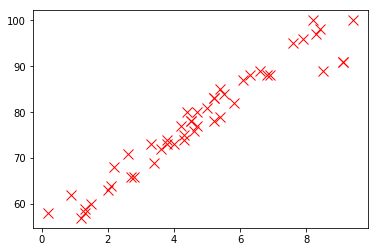

In [5]:
data = np.loadtxt("./data/01-01.csv", delimiter=",", skiprows=1)
plt.plot(data[:,0], data[:,1], 'rx', markersize=10, label="Test")

$\large J(w_{0}, w_{1}) = \frac{1}{2m} \sum_{i=1}^m((w_{1}x+w_{0}) - y_{i})^{2}$

In [7]:
#コスト関数
def cost(w0, w1, data):
    cost = 0
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        cost += ((w1 * x + w0) - y) ** 2
    cost = cost / (len(data) * 2)
    return cost

print(cost(0,0,data))

3128.3979591836733


<ul>
<li>最急降下法の数式：<br><br>
\(\large w_{0} := w_{0} - \alpha\frac{1}{m}\sum_{i=1}^m(\hat y_{i} - y_{i}) \)<br><br>
\(\large w_{1} := w_{1} - \alpha\frac{1}{m}\sum_{i=1}^m(\hat y_{i} - y_{i})\cdot x_{i} \)
</li>
<hr>
</ul>


In [14]:
#最急降下法
def gradientDesent(w0_in, w1_in, data, alpha):
    w0_gradient = 0
    w1_gradient = 0
    m = float(len(data))
    
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        w0_gradient += (1/m) * (((w1_in * x) + w0_in) - y)
        w1_gradient += (1/m) * ((((w1_in * x) + w0_in) - y) * x)
    
    w0_out = w0_in - (alpha * w0_gradient)
    w1_out = w1_in - (alpha * w1_gradient)
    return w0_out, w1_out
print(gradientDesent(0,0, data, 0.1))

(7.822448979591835, 40.169183673469384)


In [18]:
def run(data, iterations=1000, init_w0=0, init_w1=0, alpha=0.01):
    w0 = init_w0
    w1 = init_w1
    for i in range(iterations):
        wo, w1 = gradientDesent(w0, w1, np.array(data), alpha)
    return w0, w1

print(run(data, 5000))

(0, 14.07026949746229)
